In [18]:
import numpy as np
import pandas as pd
from datetime import datetime
from meteostat import Point, Hourly
import meteostat
import plotly.express as px
import math
from pandas_profiling import ProfileReport
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from pandas_profiling import ProfileReport
sns.set(rc={'figure.figsize':(16,8.27)})
plt.rcParams.update({'font.size': 30})

In [6]:
meta_data = pd.read_csv("../data/pump_station_meta_data.csv", index_col=0)
columns=["DateTime", "Power_P1", "Power_P2", "Water_Height", "Outflow"]

In [7]:
def water_level_to_volume(water_level: pd.Series, pump):
    return water_level * (meta_data.loc[pump]["radius"]**2 * math.pi) * 1000

In [8]:
# Read in the data PST
pump = "PST232"
year = "2021"
month = "April"

pump = pd.read_csv(f"../data/HistoricData/{pump}/{pump}_{year}_{month}.csv", encoding="cp1252", sep=";", decimal=",")
pump.columns = columns
pump["DateTime"] = pd.to_datetime(pump["DateTime"], format="%d-%m-%Y %H:%M:%S,%f")

In [9]:
def fetch_historic_weather(start: datetime, end: datetime, long, lat): # More details in ATTACHMENT 1
    pump_station_loc = Point(long, lat)
    # Get hourly data for 2020
    weather_data_hour = Hourly(pump_station_loc, start, end)
    weather_data_hour = weather_data_hour.normalize()                         # Ensures there is one data point per hour
    weather_data_hour = weather_data_hour.fetch()                             # Fetches data from given coordinates
    #print(weather_data_hour)
    return weather_data_hour
meteostat.


In [16]:
pd.read_csv('../data/pump_locations.csv')['PST232'][0]

55.27800429138554

In [20]:
loc = pd.read_csv('../data/pump_locations.csv')['PST232']
tst =fetch_historic_weather(datetime(2022, 3, 15, 0), datetime(2022, 3, 16, 0), loc[0], loc[1])
tst = tst['temp', 'prcp', 'snow']


,temp,dwpt,rhum,prcp,snow,wdir,wspd,wpgt,pres,tsun,coco
time,,,,,,,,,,,
2022-03-15 00:00:00,4.3,1.0,79.0,0.0,NaN,231.0,10.4,21.6,1026.4,NaN,2.0
2022-03-15 01:00:00,4.2,2.7,90.0,0.0,NaN,228.0,15.8,23.4,1026.6,NaN,3.0
2022-03-15 02:00:00,4.0,3.4,96.0,0.0,NaN,231.0,12.6,20.5,1026.6,NaN,3.0
2022-03-15 03:00:00,4.1,2.8,91.0,0.0,NaN,249.0,18.0,23.8,1026.4,NaN,3.0
2022-03-15 04:00:00,4.1,2.9,92.0,0.0,NaN,249.0,21.6,28.8,1026.6,NaN,4.0
2022-03-15 05:00:00,4.2,3.3,94.0,0.0,NaN,250.0,23.0,30.6,1026.9,NaN,4.0
2022-03-15 06:00:00,4.3,3.9,97.0,0.0,NaN,254.0,21.6,33.1,1027.3,NaN,4.0
2022-03-15 07:00:00,4.4,3.1,91.0,0.0,NaN,257.0,9.3,22.2,1028.3,NaN,4.0
2022-03-15 08:00:00,5.4,3.6,88.0,0.0,NaN,259.0,9.3,20.4,1028.2,NaN,4.0


In [11]:
# PST238["Outflow_RolAvg_7"] = PST238["Outflow"].rolling(7).mean()
# PST232["Outflow_RolAvg_7"] = PST232["Outflow"].rolling(7).mean()
# PST232["Volume"] = water_level_to_volume(PST232["Water_Height"], "PST232")
pump["Volume"] = water_level_to_volume(pump["Water_Height"], "PST232")


# P1 Power Consumption vs P2 Power Consumption 

Text(0.5, 0, 'Time')

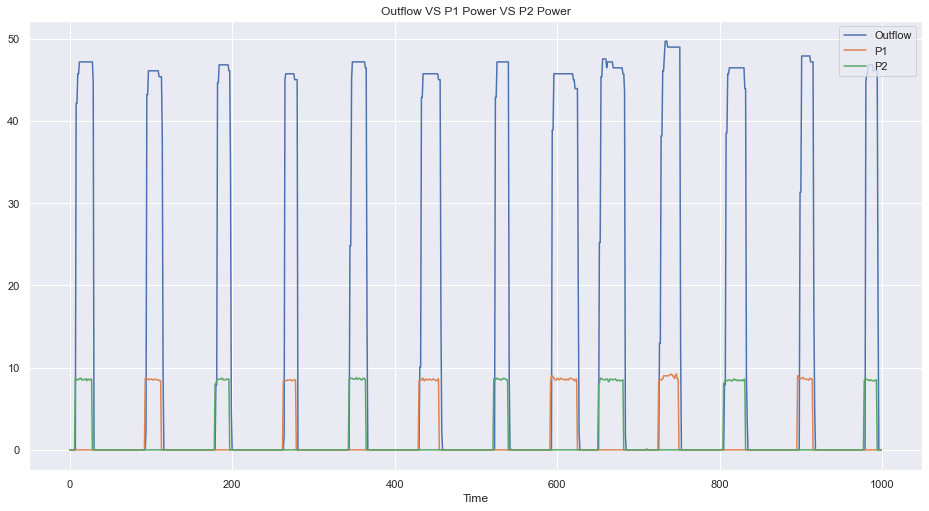

In [19]:
fig, ax = plt.subplots()
pump.Outflow[0:1000].plot(title="Outflow VS P1 Power VS P2 Power")
pump["Power_P1"][0:1000].plot()
pump["Power_P2"][0:1000].plot()
ax.legend(["Outflow", "P1", "P2"], loc="upper right")
ax.set_xlabel("Time")

# Water Height looks correct in combination with Outflow

In [ ]:
fig, ax = plt.subplots()
pump.Outflow[0:1000].plot(title="Outflow VS Water Height")
pump.Water_Height[0:1000].plot()
ax.legend(["Outflow", "Water Level"], loc="upper right")
ax.set_xlabel("Time")


# General findings
- Outflow of this pumping station isnot correct if two pumps pump together. It shoots up to 500 m3/h
- Fx 02-11-2020 Sometimes p1 24 p2 75 and sometimes p1 52 and p2 52
- Currents ramp up to 100% which usually stay under 10%
- Sometimes high current and low outflow

In [16]:
profile = ProfileReport(pump, title="Pandas Profiling Report",  explorative=True)
profile.to_notebook_iframe()

Render HTML: 100%|██████████| 1/1 [00:00<00:00,  1.13it/s]
